---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 4.4 Composite Newton-Cortes Formulas
---

## Composite quadrature methods

We can obtain improved approximations of $\displaystyle\int_a^b f(x)\,dx$ by dividing the interval $[a,b]$ into $n$ equal subintervals:

$$[x_0,x_1], \quad [x_1,x_2], \quad \ldots, \quad [x_{n-1},x_{n}],$$

where $x_0 = a$ and $x_{n} = b$.  Then

$$
\int_a^b f(x)\,dx = \int_{x_{0}}^{x_{1}} f(x)\,dx+\int_{x_{1}}^{x_{2}} f(x)\,dx+\cdots+\int_{x_{n-1}}^{x_{n}} f(x)\,dx=\sum_{j=1}^{n} \int_{x_{j-1}}^{x_{j}} f(x)\,dx.
$$

The length of each subinterval is

$$ h = \frac{b - a}{n},$$

and $x_j = a + jh$, for $j = 0, 1, \ldots, n$.

![title](Simpson-rule.png)
---

---

### Composite trapezoidal rule

From the trapezoidal rule for the $j^{\mathrm{th}}$ interval $[x_{j-1},x_{j}]$, we have

$$
\begin{split}
\int_{x_{j-1}}^{x_{j}} f(x)\,dx 
& = \frac{x_{j-1} - x_{j}}{2}\brack{f(x_{j-1}) + f(x_{j})} - \frac{f''(\xi_j)}{12}(x_{j} - x_{j-1})^3 \\
& = \frac{h}{2}\brack{f(x_{j-1}) + f(x_{j})} - \frac{f''(\xi_j)}{12}h^3 \\
\end{split}
$$

for some $\xi_j \in [x_{j-1},x_{j}]$.


![title](Trapezoidal-rule.png)

--

Thus, we have:

$$
\begin{split}
\int_a^b f(x)\,dx 
&= \sum_{j=1}^n \int_{x_{j-1}}^{x_{j}} f(x)\,dx \\
&= \sum_{j=1}^n \brack{ \frac{h}{2}\brack{f(x_{j-1}) + f(x_{j})} - \frac{f''(\xi_j)}{12}h^3 }\\
&= \frac{h}{2} \brack{f(x_0) + 2f(x_1) + \cdots + 2f(x_{n-1}) + f(x_{n})} \\
&\quad -  \frac{1}{n} \paren{\sum_{j=1}^n f''(\xi_j)} \frac{n\,h^3}{12}. \\
\end{split}
$$

Again, by the **Intermediate Value Theorem**, there is a $\xi \in [a,b]$ such that

$$f''(\xi) = \frac{1}{n} \sum_{j=1}^n f''(\xi_j).$$

Therefore, we obtain the **composite trapezoidal rule**:

$$
\fbox{${\displaystyle
\int_a^b f(x)\,dx = \frac{h}{2}\brack{f(a) + 2 \sum_{j=1}^{n-1} f(a + jh) + f(b)} - \frac{f''(\xi)}{12} (b - a) h^2, 
\quad \xi \in [a,b],
}$}
$$

which has **order two accuracy**:

$$
\fbox{${\displaystyle
\abs{\int_a^b f(x)\,dx - \frac{h}{2}\brack{f(a) + 2 \sum_{j=1}^{n-1} f(a + jh) + f(b)}} \leq  \frac{\norm{f''}}{12} (b - a) h^2 = \mathcal{O}(h^2).
}$}
$$

---
## Example

The [error function](https://en.wikipedia.org/wiki/Error_function) is

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt.
$$

Thus, 

$$
\int_0^1 e^{-x^2} dx = \frac{\sqrt{\pi}}{2}\mathrm{erf}(1).
$$

In [1]:
using SpecialFunctions
√π/2*erf(1.)

0.746824132812427

In [2]:
?erf

search: erf erfi erfc erfcx erfinv erfcinv OverflowError StackOverflowError



```
erf(x)
```

Compute the error function of `x`, defined by $\frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt$ for arbitrary complex `x`.


In [2]:
f(x) = exp(-x^2)

f (generic function with 1 method)

In [4]:
a, b = 0., 1.
intf = √π/2*erf(1.)

@printf "%5s %14s %12s %10s\n" "h" "approx" "error" "time"
for r = [1e1 1e2 1e3 1e4 1e5 1e6]
    tic()
    h = (b - a)/r
    
    # Using the Trapezoidal Rule
    approx = f(a)
    for i = 1:r-1
        approx += 2f(a + i*h)
    end
    approx += f(b)
    approx *= h/2
    
    err = abs(intf - approx)
    @printf "%5.0e %14.10f %12.5e %10.5f\n" h approx err toq()
end

    h         approx        error       time
1e-01   0.7462107961  6.13337e-04    0.00004
1e-02   0.7468180015  6.13134e-06    0.00004
1e-03   0.7468240715  6.13132e-08    0.00030
1e-04   0.7468241322  6.13133e-10    0.00546
1e-05   0.7468241328  6.13998e-12    0.03428
1e-06   0.7468241328  4.34097e-14    0.29758


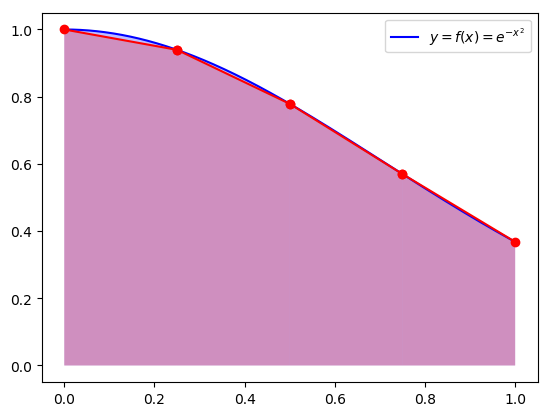

In [9]:
using PyPlot
xx = linspace(a, b, 1000)
plot(xx, f.(xx), "b", label=L"y = f(x)= e^{-x^2}")
fill_between(xx, zeros(xx), f.(xx), facecolor="b", alpha=0.25)
n = 4;
h = (b - a)/n;
for k = 1:n
    xxk = linspace(a + (k-1)*h, a + k*h, 100)
p1k(x) = f(a + (k-1)*h)*(x - (a + k*h))/(a + (k-1)*h - (a + k*h)) + 
    f(a + k*h)*(x - (a + (k-1)*h))/(a + (k)*h - (a + (k-1)*h))
plot([a + (k-1)*h, a + k*h], [f(a + (k-1)*h), f(a + k*h)], "ro")
    plot(xxk, p1k.(xxk), "r")
    fill_between(xxk, zeros(xxk), p1k.(xxk), facecolor="r", alpha=0.25)
end    
legend(loc="best");

---

### Composite Simpson rule

The Simpson rule for the $j^{\mathrm{th}}$ _pair_ of intervals $[x_{2j-2},x_{2j}]$ gives us

$$
\begin{split}
\int_{x_{2j-2}}^{x_{2j}} f(x)\,dx 
& = \frac{x_{2j} - x_{2j-2}}{6}\brack{f(x_{2j-2}) + 4f\paren{\frac{x_{2j-2} + x_{2j}}{2}} + f(x_{2j})} -\frac{f''''(\xi_j)}{90} \paren{\frac{x_{2j} - x_{2j-2}}{2}}^5 \\
& = \frac{h}{3}\brack{f(x_{2j-2}) + 4f(x_{2j-1}) + f(x_{2j})} -\frac{f''''(\xi_j)}{90} h^5 \\
\end{split}
$$

for some $\xi_j \in [x_{2j-2},x_{2j}]$.

![title](Simpson-rule.png)
---

Thus, we have ($n$ must be even):

$$
\begin{split}
\int_a^b f(x)\,dx 
&= \sum_{j=1}^{n/2} \int_{x_{2j-2}}^{x_{2j}} f(x)\,dx \\
&= \sum_{j=1}^{n/2} \brack{\frac{h}{3}\brack{f(x_{2j-2}) + 4f(x_{2j-1}) + f(x_{2j})} -\frac{f''''(\xi_j)}{90} h^5} \\
&= \frac{h}{3} \brack{f(x_0) + 4f(x_1) + 2f(x_2) + \cdots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) } 
\\
& \qquad -\frac{1}{n/2}\paren{\sum_{j=1}^{n/2} f''''(\xi_k)} \frac{h^5}{90}\frac{n}{2}. \\
\end{split}
$$

Once more, by the **Intermediate Value Theorem**, there is a $\xi \in [a,b]$ such that

$$f''''(\xi) = \frac{1}{n/2} \sum_{j=1}^{n/2} f''''(\xi_j).$$

Therefore, we obtain the **composite Simpson rule**:

$$
\fbox{${\displaystyle
\int_a^b f(x)\,dx = \frac{h}{3}\brack{f(a) + 4 \sum_{j=1}^{n/2} f(x_{2j-1}) + 2 \sum_{j=1}^{n/2-1} f(x_{2j}) + f(b)}
- \frac{f''''(\xi)}{180} (b - a) h^4
}$}
$$

for some $\xi \in [a,b]$, which has **order four accuracy**:

$$
\fbox{${\displaystyle
\abs{\int_a^b f(x)\,dx - \frac{h}{3}\brack{f(a) + 4 \sum_{j=1}^{n/2} f(x_{2j-1}) + 2 \sum_{j=1}^{n/2-1} f(x_{2j}) + f(b)}} \leq
\frac{\norm{f''''}}{180} (b - a) h^4 = \mathcal{O}(h^4).
}$}
$$


---
## Example

$$
\int_0^1 e^{-x^2}\,dx = 0.746824132812427
$$

In [10]:
f(x) = exp(-x^2)

f (generic function with 1 method)

In [12]:
using SpecialFunctions
a, b = 0., 1.
intf = √π/2*erf(1.)

@printf "%5s %14s %12s %10s\n" "h" "approx" "error" "time"
for n = [1e1 1e2 1e3 1e4 1e5]
    tic()
    h = (b - a)/n
    
    # Using the Simpson Rule
    approx = f(a)
    for k = 1:n/2-1
        approx += 4f(a + (2k-1)*h)
        approx += 2f(a + (2k)*h)
    end
    approx += 4f(a + (n-1)*h)
    approx += f(b)
    approx *= h/3
    
    err = abs(intf - approx)
    @printf "%5.0e %14.10f %12.5e %10.5f\n" h approx err toq()
end

    h         approx        error       time
1e-01   0.7468249483  8.15442e-07    0.00006
1e-02   0.7468241329  8.17488e-11    0.00006
1e-03   0.7468241328  8.88178e-15    0.00040
1e-04   0.7468241328  5.55112e-16    0.00418
1e-05   0.7468241328  8.88178e-16    0.04662


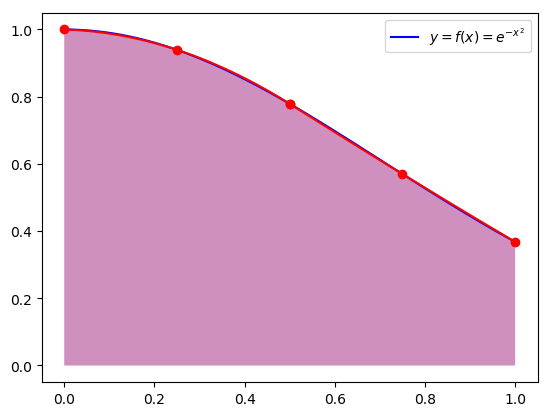

In [15]:
using PyPlot
xx = linspace(a, b, 1000)
plot(xx, f.(xx), "b", label=L"y = f(x)= e^{-x^2}")
fill_between(xx, zeros(xx), f.(xx), facecolor="b", alpha=0.25)
n = 4;
h = (b - a)/n;
for k = 1:n/2
    xxk = linspace(a + (2k-2)*h, a + (2k)*h, 100)
    m = (a + (2k-2)*h + a + (2k)*h)/2
p2k(x) = 
    f(a + (2k-2)*h)*(x - m)*(x - (a + (2k)*h))/(a + (2k-2)*h - m)/(a + (2k-2)*h - (a + (2k)*h)) + 
    f(m)*(x - (a + (2k-2)*h))*(x - (a + (2k)*h))/(m - (a + (2k-2)*h))/(m - (a + (2k)*h)) + 
    f(a + (2k)*h)*(x - (a + (2k-2)*h))*(x - m)/(a + (2k)*h - (a + (2k-2)*h))/(a + (2k)*h - m)
plot([a + (2k-2)*h, a + (2k-1)*h, a + (2k)*h], [f(a + (2k-2)*h), f(a + (2k-1)*h), f(a + (2k)*h)], "ro")
    plot(xxk, p2k.(xxk), "r")
    fill_between(xxk, zeros(xxk), p2k.(xxk), facecolor="r", alpha=0.25)
end    
legend(loc="best");

---

## Composite quadrature rules summary

$$
\begin{align}
\\
\int_a^b f(x)\,dx &= \frac{h}{2}\brack{f(a) + 2 \sum_{j=1}^{n-1} f(a + jh) + f(b)} - \frac{f''(\xi)}{12} (b - a) h^2  
\quad &\text{(Trapezoidal)} \\\\
\int_a^b f(x)\,dx &= \frac{h}{3}\brack{f(a) + 4 \sum_{j=1}^{n/2} f(x_{2j-1}) + 2 \sum_{j=1}^{n/2-1} f(x_{2j}) + f(b)} - \frac{f''''(\xi)}{180} (b - a) h^4
\quad &\text{(Simpson)} \\\\
\end{align}
$$

In each case, $\xi$ is some unknown point in the interval $[a,b]$.

---

## Computational cost

We measure the computational cost of a quadrature rule by counting the number of function evaluations required.

As $h$ gets smaller, the number of subintervals $n$ gets larger.

We can see from the above quadrature rules that we need:

- $n + 1$ function evaluations for the Trapezoidal rule;
- $n + 1$ function evaluations for the Simpson rule.

Thus, the Simpson rule is the most efficient in terms of number of function evaluations versus the order of accuracy.

---

## Numerical integration of noisy data

Numerical integration is not sensitive to random noise in the function values.

Let 

$$f(x) = e^x \sin(3x).$$ 

Then

$$ \int_0^x f'(t)\, dt = f(x) - f(0) = f(x) . $$

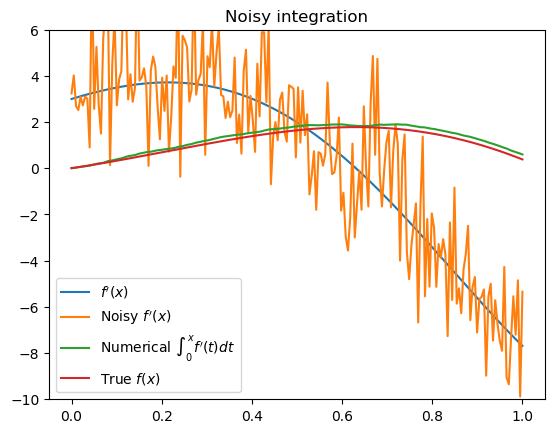

In [9]:
using PyPlot

f(x)  = exp(x)*(                sin(3x))
f1(x) = exp(x)*(  3cos(3x) +    sin(3x))

a, b, r = 0, 1, 200

xx = linspace(a, b, r)
h = xx[2] - xx[1]

yyp = f1.(xx)

yypn = yyp + 2*randn(size(yyp))  # add noise to derivative values

# Using the composite trapezoid rule on the noisy data
yyn = h/2*[yypn[1] + 2*sum(yypn[2:k-1]) + yypn[k] for k=1:r]

yytrue = f.(xx)

plot(xx, yyp, label=L"f'(x)")
plot(xx, yypn, label=L"Noisy $f'(x)$")
plot(xx, yyn, label=L"Numerical $\int_0^x f'(t) dt$")
plot(xx, yytrue, label=L"True $f(x)$")
legend(loc="lower left")
title("Noisy integration")
ylim(-10, 6);

---